# ⚽ Machine Learning na Copa dos Dados!
### Classificando times de futebol com KNN e Árvore de Decisão

Hoje os algoritmos são os técnicos. Será que o KNN e a Árvore de Decisão conseguem prever se um time é campeão, mediano ou rebaixado com base em seus dados?


## 📝 Objetivo
Vamos trabalhar com um dataset simplificado de **estatísticas de times de futebol europeu** (gols, posse de bola, finalizações, etc.).

Vamos usar:
- KNN (K-Nearest Neighbors)
- Decision Tree (Árvore de Decisão)
- Avaliação com acurácia e matriz de confusão

Ao final, vocês serão desafiados a mudar hiperparâmetros e interpretar os resultados.

In [1]:
# 📦 Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# ⚽ Criando o dataset de estatísticas dos times
np.random.seed(42)
n = 90
data = {
    'gols_marcados': np.random.randint(20, 80, size=n),
    'gols_sofridos': np.random.randint(20, 80, size=n),
    'posse_media': np.round(np.random.uniform(40, 65, size=n), 2),
    'finalizacoes': np.random.randint(200, 500, size=n),
    'classe': [0]*30 + [1]*30 + [2]*30  # 0 = Rebaixado, 1 = Meio da tabela, 2 = Campeão
}
df = pd.DataFrame(data)
df.sample(10)

,gols_marcados,gols_sofridos,posse_media,finalizacoes,classe
55,58,26,51.19,248,1
63,28,42,64.59,432,2
33,63,44,57.31,394,1
17,43,64,51.41,312,0
72,63,20,45.51,452,2
2,48,53,62.39,339,0
10,42,33,63.57,330,0
9,38,27,45.08,407,0
53,40,60,57.02,234,1
69,66,41,57.40,387,2


In [11]:
# 🔍 Separando variáveis independentes e alvo
X = df.drop('classe', axis=1)
y = df['classe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# 🟢 Aplicando KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Acurácia KNN:", accuracy_score(y_test, y_pred_knn))

Acurácia KNN: 0.2962962962962963


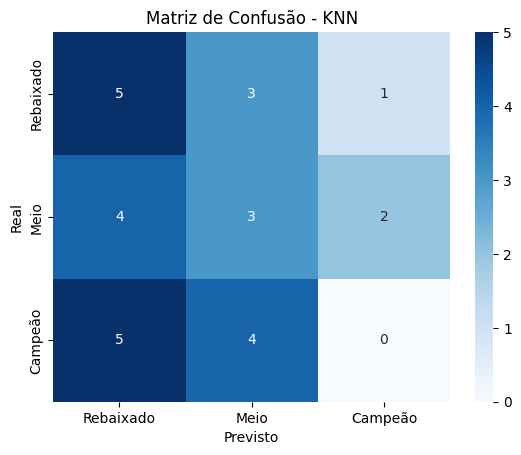

In [19]:
# 📊 Matriz de Confusão KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d', xticklabels=['Rebaixado', 'Meio', 'Campeão'], yticklabels=['Rebaixado', 'Meio', 'Campeão'])
plt.title('Matriz de Confusão - KNN')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [23]:
# 🌳 Aplicando Árvore de Decisão
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Acurácia Árvore de Decisão:", accuracy_score(y_test, y_pred_tree))

Acurácia Árvore de Decisão: 0.4444444444444444


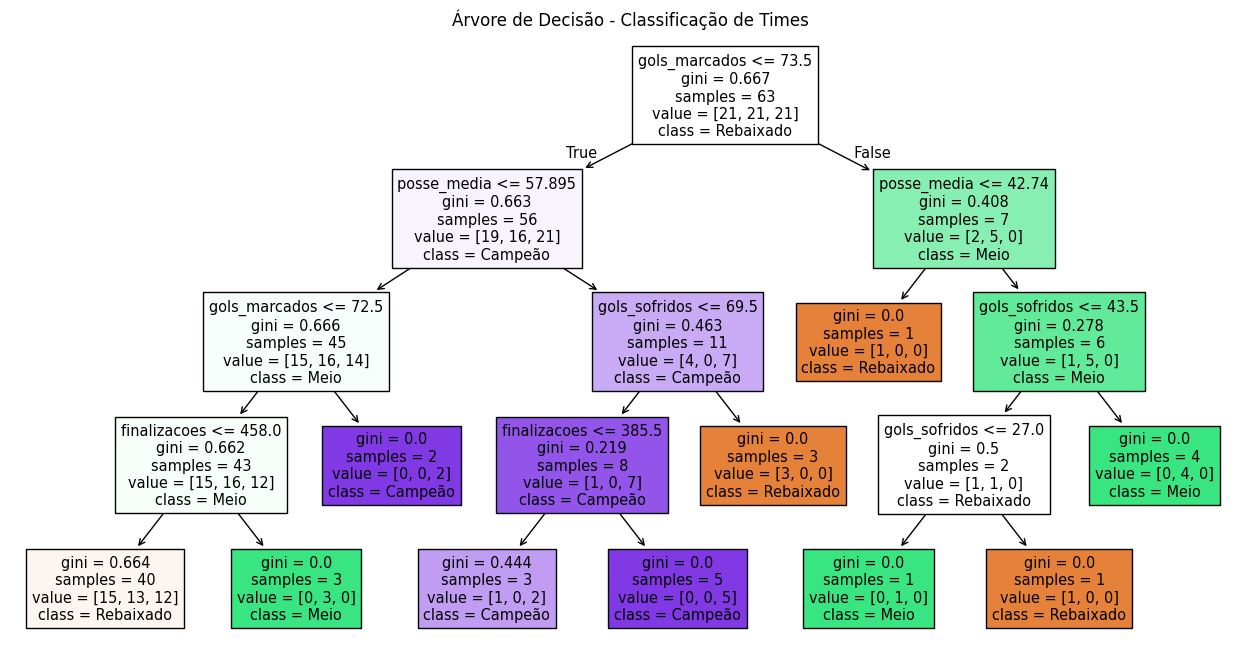

In [7]:
# 🌲 Visualizando a Árvore de Decisão
plt.figure(figsize=(16, 8))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Rebaixado', 'Meio', 'Campeão'])
plt.title('Árvore de Decisão - Classificação de Times')
plt.show()

## 🧠 Atividade Final
1. Altere `n_neighbors` no KNN para 1, 5 e 7. Observe as diferenças.
2. Altere `max_depth` na Árvore para 2, 6 e None. O que muda?
3. Compare os resultados das matrizes de confusão.

💬 Discuta: Qual modelo parece mais confiável? Mais simples de interpretar?